In [1]:
import sys
sys.path.append("../")
from plotting import CandlePlot
import pandas as pd

In [2]:
from technicals.patterns import apply_patterns

In [3]:
df = pd.read_pickle("../data/GBP_JPY_H1.pkl")

In [4]:
df_an = df[['time', 'mid-c', 'mid-o', 'mid-h', 'mid-l']].copy()

In [5]:
df_an.tail()

,time,mid-c,mid-o,mid-h,mid-l
37219,2021-12-30 19:00:00+00:00,155.444,155.312,155.444,155.274
37220,2021-12-30 20:00:00+00:00,155.312,155.442,155.470,155.289
37221,2021-12-30 21:00:00+00:00,155.382,155.317,155.382,155.286
37222,2021-12-30 22:00:00+00:00,155.329,155.353,155.381,155.282
37223,2021-12-30 23:00:00+00:00,155.310,155.336,155.360,155.284


In [6]:
df_an= apply_patterns(df_an)

In [7]:
df_an.tail()

,time,mid-c,mid-o,mid-h,mid-l,body_lower,body_upper,body_bottom_perc,body_top_perc,body_perc,...,body_perc_prev_2,HANGING_MAN,SHOOTING_STAR,SPINNING_TOP,MARUBOZU,ENGULFING,TWEEZER_TOP,TWEEZER_BOTTOM,MORNING_STAR,EVENING_STAR
37219,2021-12-30 19:00:00+00:00,155.444,155.312,155.444,155.274,155.312,155.444,22.352941,100.000000,77.647059,...,86.390533,False,False,False,False,True,False,False,False,False
37220,2021-12-30 20:00:00+00:00,155.312,155.442,155.470,155.289,155.312,155.442,12.707182,84.530387,71.823204,...,12.337662,False,False,False,False,False,False,False,False,False
37221,2021-12-30 21:00:00+00:00,155.382,155.317,155.382,155.286,155.317,155.382,32.291667,100.000000,67.708333,...,77.647059,False,False,False,False,False,False,False,False,False
37222,2021-12-30 22:00:00+00:00,155.329,155.353,155.381,155.282,155.329,155.353,47.474747,71.717172,24.242424,...,71.823204,False,False,False,False,False,False,False,False,False
37223,2021-12-30 23:00:00+00:00,155.310,155.336,155.360,155.284,155.310,155.336,34.210526,68.421053,34.210526,...,67.708333,False,False,False,False,False,False,False,False,False


In [8]:
import plotly.graph_objects as go

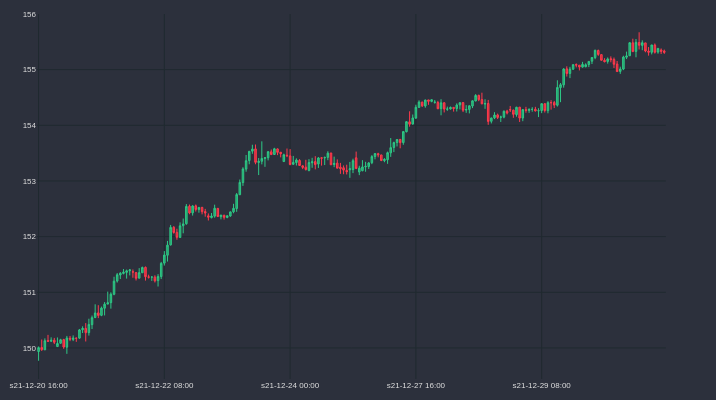

In [10]:
MARKER = '#0066FF'
dfp= df_an.iloc[-200:]
cp= CandlePlot(dfp, candles=True)
df_temp= cp.df_plot[cp.df_plot.MARUBOZU==True]
cp.fig.add_trace(go.Candlestick(
    x=df_temp.sTime,
    open= df_temp['mid-o'],
    high= df_temp['mid-h'],
    low= df_temp['mid-l'],
    close= df_temp['mid-c'],
    line=dict(width=1), opacity=1,
    increasing_fillcolor=MARKER,
    decreasing_fillcolor=MARKER,
    increasing_line_color=MARKER,
    decreasing_line_color=MARKER

    ))
        

cp.show_plot()